In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## ข้อ 1

In [6]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


## ข้อ 2

In [7]:
df.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [8]:
df.tail(10)

,Review,Liked
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [9]:
df.sample(10)

,Review,Liked
967,Hell no will I go back,0
706,The atmosphere here is fun.,1
63,We'd definitely go back here again.,1
61,This place receives stars for their APPETIZERS!!!,1
265,"Plus, it's only 8 bucks.",1
511,"Give it a try, you will be happy you did.",1
562,A good time!,1
16,Highly recommended.,1
334,I love this place.,1
994,I can't tell you how disappointed I was.,0


## ข้อ 3

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [11]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## ข้อ 4

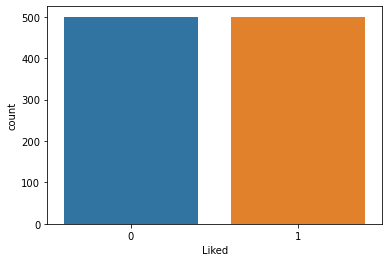

In [13]:
sns.countplot(df['Liked'])

## ข้อ 5

In [15]:
df['Review'].apply(len)

0       24
1       18
2       41
3       87
4       59
      ... 
995     66
996     24
997     50
998     91
999    134
Name: Review, Length: 1000, dtype: int64

In [16]:
df['length'] = df['Review'].apply(len)

In [17]:
df

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


## ข้อ 6

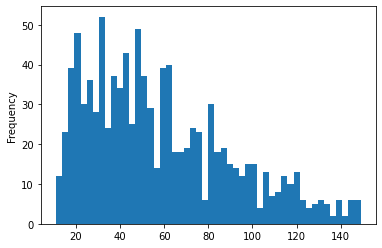

In [18]:
df['length'].plot(bins=50, kind='hist')

## ข้อ 7

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc45bcc42e0>,
      dtype=object)

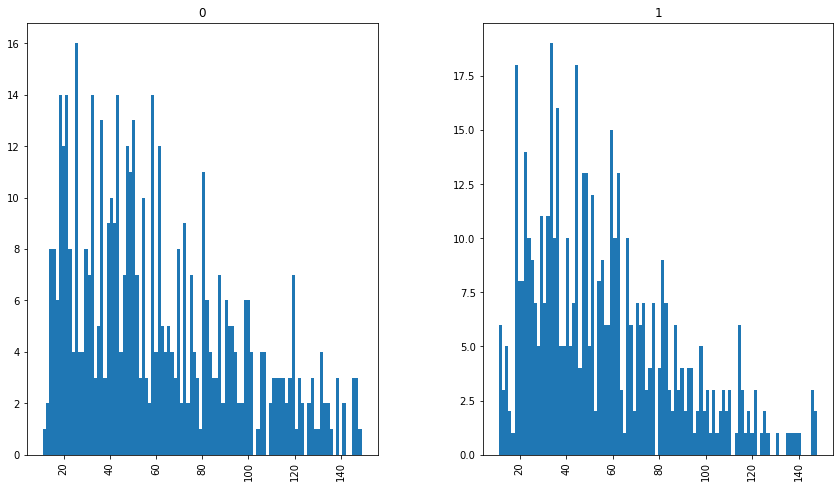

In [19]:
df.hist(column='length', by='Liked', bins=100, figsize=(14, 8))

## ข้อ 8

In [20]:
df['length'].max()

149

In [22]:
df[df['length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

## ข้อ 9

In [23]:
df.groupby('Liked').mean()

,length
Liked,
0,60.75
1,55.88


## ข้อ 10

In [25]:
for i in range(10):
    print('\n', df[df['Liked']==0]['Review'].iloc[i])


 Crust is not good.

 Not tasty and the texture was just nasty.

 Now I am getting angry and I want my damn pho.

 Honeslty it didn't taste THAT fresh.)

 The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.

 Would not go back.

 The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.

 I was disgusted because I was pretty sure that was human hair.

 I was shocked because no signs indicate cash only.

 Waitress was a little slow in service.


In [26]:
for i in range(10):
    print('\n', df[df['Liked']==1]['Review'].iloc[i])


 Wow... Loved this place.

 Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.

 The selection on the menu was great and so were the prices.

 The fries were great too.

 A great touch.

 Service was very prompt.

 I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!

 Highly recommended.

 The food, amazing.

 Service is also cute.


## ข้อ 11

In [39]:
import string
from nltk.corpus import stopwords
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/momay.shi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
def text_filtering(review):
    # remove punc
    no_punc = [x for x in review if x not in string.punctuation]
    
    # join
    no_punc = ''.join(no_punc)
    
    # remove stopwords
    text = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    
    return text
    

In [43]:
df['Review'].head(10).apply(text_filtering)

0                                  [Wow, Loved, place]
1                                        [Crust, good]
2                              [tasty, texture, nasty]
3    [Stopped, late, May, bank, holiday, Rick, Stev...
4                     [selection, menu, great, prices]
5                    [getting, angry, want, damn, pho]
6                      [Honeslty, didnt, taste, fresh]
7    [potatoes, like, rubber, could, tell, made, ah...
8                                       [fries, great]
9                                       [great, touch]
Name: Review, dtype: object

## ข้อ 12

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
bow_transformer = CountVectorizer(analyzer=text_filtering).fit(df['Review'])
bow_transformer

CountVectorizer(analyzer=<function text_filtering at 0x7fc45bc8c160>)

## ข้อ 13

In [47]:
len(bow_transformer.vocabulary_)

2159

## ข้อ 14

In [61]:
bow_review = bow_transformer.transform(df['Review'])
bow_review

<1000x2159 sparse matrix of type '<class 'numpy.int64'>'
	with 5606 stored elements in Compressed Sparse Row format>

## ข้อ 15

In [62]:
bow_review.shape

(1000, 2159)

In [63]:
print('% of Sparsity: ', (bow_review.nnz*100)/(bow_review.shape[0]*bow_review.shape[1]))

% of Sparsity:  0.25965724872626217


## ข้อ 16

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer

In [68]:
tfidf_transformer = TfidfTransformer().fit(bow_review)

In [69]:
tfidf_review = tfidf_transformer.transform(bow_review)
tfidf_review

<1000x2159 sparse matrix of type '<class 'numpy.float64'>'
	with 5606 stored elements in Compressed Sparse Row format>

In [74]:
bow_test = bow_transformer.transform([df['Review'][3]])
bow_test

<1x2159 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [77]:
print(bow_test)

  (0, 265)	1
  (0, 342)	1
  (0, 380)	1
  (0, 381)	1
  (0, 541)	1
  (0, 1162)	1
  (0, 1255)	1
  (0, 1305)	1
  (0, 1651)	1


In [78]:
tfidf_test = tfidf_transformer.transform(bow_test)

In [79]:
print(tfidf_test)

  (0, 1651)	0.3141106238036609
  (0, 1305)	0.287160477238048
  (0, 1255)	0.32796490415818413
  (0, 1162)	0.34749141560824715
  (0, 541)	0.34749141560824715
  (0, 381)	0.32796490415818413
  (0, 380)	0.34749141560824715
  (0, 342)	0.34749141560824715
  (0, 265)	0.34749141560824715


## ข้อ 17

In [81]:
from sklearn.naive_bayes import MultinomialNB

In [82]:
nb = MultinomialNB()

In [83]:
X = tfidf_review
y = df['Liked']

In [84]:
review_rating_model = nb.fit(X, y)

In [85]:
predicted = review_rating_model.predict(X)

## ข้อ 18

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [87]:
confusion_matrix(y, predicted)

array([[486,  14],
       [ 21, 479]])

## ข้อ 19

In [89]:
print('Acc: ', accuracy_score(predicted, y))
print('F1 Score: ', f1_score(predicted, y))
print('Precision Score: ', precision_score(predicted, y))
print('Recall: ', recall_score(predicted, y))

Acc:  0.965
F1 Score:  0.9647532729103725
Precision Score:  0.958
Recall:  0.9716024340770791


## ข้อ 20

In [90]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [91]:
review_rating = nb.fit(X.todense(), y)

## ข้อ 21

In [93]:
predicted = review_rating.predict(X.todense())

In [94]:
confusion_matrix(predicted, y)

array([[456,   0],
       [ 44, 500]])

## ข้อ 22

In [95]:
print('Acc: ', accuracy_score(predicted, y))
print('F1 Score: ', f1_score(predicted, y))
print('Precision Score: ', precision_score(predicted, y))
print('Recall: ', recall_score(predicted, y))

Acc:  0.956
F1 Score:  0.9578544061302682
Precision Score:  1.0
Recall:  0.9191176470588235


## ข้อ 23

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
review_train, review_test, label_train, label_test = train_test_split(df['Review'], df['Liked'], test_size=0.2)

## ข้อ 24

In [99]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_filtering)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [100]:
pipeline.fit(review_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_filtering at 0x7fc45bc8c160>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

## ข้อ 25

In [102]:
predicted = pipeline.predict(review_test)
predicted

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1])

In [104]:
confusion_matrix(predicted, label_test)

array([[78, 21],
       [22, 79]])

## ข้อ 26

In [105]:
print('Acc: ', accuracy_score(predicted, label_test))
print('F1 Score: ', f1_score(predicted, label_test))
print('Precision Score: ', precision_score(predicted, label_test))
print('Recall: ', recall_score(predicted, label_test))

Acc:  0.785
F1 Score:  0.7860696517412936
Precision Score:  0.79
Recall:  0.7821782178217822
